## RULE-BASED CLASSIFICATION


- A game company wants to create level-based new customer definitions (personas) by using some features of its customers, and to create segments according to these new customer definitions and to estimate how much the new customers can earn on average according to these segments.

- For example: It is desired to determine how much a 25-year-old male user from Turkey, who is an IOS user, can earn on average.

### Dataset Story

-Persona.csv dataset contains the prices of the products sold by an international game company and some demographic information of the users who buy these products. The data set consists of records created in each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.

Variables:

   - **Price:** Customer's spending amount
   - **Source:** The type of device the customer is connecting to
   - **Sex:** Gender of the client
   - **Country:** Country of the customer
   - **Age:** Customer's age
   - **For example:** It is desired to determine how much a 
    
    25-year-old male user from Turkey who is an IOS user can earn on average.

### Reading the persona.csv file and showing general information about the dataset**


- Importing the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [31]:
df = pd.read_csv("persona.csv")
df.head(5)

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [32]:
def data_sum(df):
   
    print("################################ DATASET OVERVİEW ####################################","\n",

      "1-Number of Variables:",df.shape[1],"\n\n",
      "2-Number of Observations:",df.shape[0],"\n\n",
      "3-Type of Variables:","\n\n",df.dtypes,"\n\n",
      "4-Top 5 Observations:","\n\n",df.head(5),"\n\n",
      "5:Last 5 Observations:","\n\n",df.tail(5),"\n\n",
      "6:Number of Null Observations:","\n\n",df.isnull().sum(),"\n\n",
      "7:Summary Statistic of Data:","\n\n",df.describe([0, 0.05,0.25, 0.50, 0.75,0.95, 0.99, 1]).T,"\n\n",
      "8:Number of rows, columns and data structure of dataset:","\n\n",df.info,"\n\n")
      

In [33]:
data_sum(df)

################################ DATASET OVERVİEW #################################### 
 1-Number of Variables: 5 

 2-Number of Observations: 5000 

 3-Type of Variables: 

 PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object 

 4-Top 5 Observations: 

    PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17 

 5:Last 5 Observations: 

       PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31 

 6:Number of Null Observations: 

 PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64 

 7:Summary Statistic of Data: 

         count     mean        std   min 

# Let's ask the questions that will lead us step by step to the segmentation of customers.

### How many unique SOURCE are there? What are their frequencies?

In [34]:
df["SOURCE"].nunique()


2

In [35]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

### How many unique PRICE are there?

In [36]:
df["PRICE"].nunique()

6

### How many sales were made from which PRICE?

In [37]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

### How many sales were made from which country?

In [38]:
df.groupby("COUNTRY").agg({"SOURCE":["count"]})

,SOURCE
,count
COUNTRY,
bra,1496
can,230
deu,455
fra,303
tur,451
usa,2065


In [39]:
df["COUNTRY"].value_counts()#frequency distributions of countries

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

### How much was earned in total from sales by country?

In [40]:
ulke_satis = df.groupby("COUNTRY").agg({"PRICE":"sum"})
ulke_satis 

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


### What are the sales numbers according to SOURCE types?

In [41]:
df.groupby("SOURCE").agg({"PRICE":"count"})

,PRICE
SOURCE,
android,2974
ios,2026


### What are the PRICE averages by country?

In [42]:
ulke_ort_sat=df.groupby("COUNTRY").agg({"PRICE":"mean"})
ulke_ort_sat

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


### What are the PRICE averages based on SOURCEs?

In [43]:
df.groupby("SOURCE").agg({"PRICE":"mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


### What are the PRICE averages in the COUNTRY-SOURCE breakdown?

In [44]:
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

### What are the average earnings in breakdown of COUNTRY, SOURCE, SEX, AGE?

In [46]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX", "AGE"]).agg({"PRICE":"mean"})
agg_df


PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

### Let's sort the output by PRICE.

In [47]:
agg_df= agg_df.sort_values(by="PRICE",ascending=False)
agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

### Convert the names in the index to variable names.

In [49]:
agg_df= df.reset_index()

In [50]:
agg_df.head()

,index,PRICE,SOURCE,SEX,COUNTRY,AGE
0,0,39,android,male,bra,17
1,1,39,android,male,bra,17
2,2,49,android,male,bra,17
3,3,29,android,male,tur,17
4,4,49,android,male,tur,17


### Let's convert the age variable to a categorical variable and add it to agg_df

In [51]:
def change_func(x):
    if 0 < x <= 18:
        return "0_18"
    elif 18< x <= 23:
        return "19_23"
    elif 23 < x <= 30:
        return "24_30"
    elif 30 < x <= 40:
        return "31_40"
    elif 40 < x <= 70:
        return "41_70"

In [52]:
#Örneğin: ‘0_18', ‘19_23', '24_30', '31_40', '41_70'

In [53]:
agg_df["AGE_CAT"] = agg_df["AGE"].apply(lambda x: change_func(x))

In [58]:
agg_df[["AGE_CAT"]].value_counts()

AGE_CAT
0_18       1861
19_23      1282
24_30       911
31_40       594
41_70       352
dtype: int64

In [59]:
agg_df.sort_values(by=["PRICE","AGE_CAT"],ascending=False).head(5)


,index,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_CAT
256,256,59,ios,male,usa,50,41_70
430,430,59,android,male,usa,42,41_70
486,486,59,ios,male,bra,66,41_70
700,700,59,android,female,usa,47,41_70
861,861,59,ios,male,usa,59,41_70


###  Let's define new level-based customers (personas)
- Let's define new level-based customers (personas) and add them as variables to the dataset

- Name of the new variable to be added: customers_level_based
    


In [60]:
agg_df["customers_level_based"] = [col[0].upper()+"_"+col[1].upper()+"_"+ col[2].upper()+"_"+col[3].upper() for col in agg_df[["COUNTRY","SOURCE","SEX","AGE_CAT"]].values]

In [61]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE":"mean"})

In [62]:
agg_df= agg_df.reset_index()

In [63]:
agg_df.sort_values(by="PRICE",ascending=False).head(5)

,customers_level_based,PRICE
86,TUR_IOS_MALE_24_30,45.000000
87,TUR_IOS_MALE_31_40,42.333333
72,TUR_ANDROID_FEMALE_31_40,41.727273
25,CAN_ANDROID_MALE_19_23,40.111111
78,TUR_ANDROID_MALE_41_70,39.000000


### Let's segment new customers (contacts)

In [64]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"],4,labels = ["Low","Medium","Good","Very_good"])

In [69]:
agg_df.groupby("SEGMENT").agg({"PRICE": ['mean','min','max','std','sum','count']}).sort_values("SEGMENT",ascending = False)

PRICE                                                   
                mean        min        max       std          sum count
SEGMENT                                                                
Very_good  37.544294  35.521739  45.000000  2.394170  1013.695935    27
Good       34.681428  34.054348  35.439394  0.446647   867.035711    25
Medium     33.512842  32.703704  34.000000  0.430959   971.872429    29
Low        30.113161  19.000000  32.658537  3.049965   843.168512    28

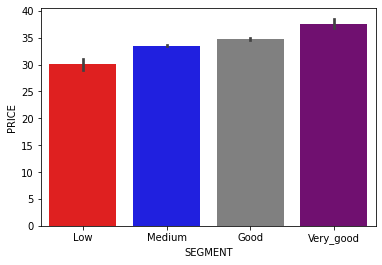

In [84]:
semgment_viz= sns.barplot(data=agg_df, x="SEGMENT", y="PRICE", palette= ["red","blue","grey","purple"] )


### Let's categorize new customers and estimate how much revenue they can generate

- What segment does a 33-year-old Turkish woman using ANDROID belong to and how much income is expected to earn on average?

In [67]:
new_user = "TUR_ANDROID_FEMALE_31_40"

agg_df[agg_df["customers_level_based"]== new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.727273,Very_good


- What segment does a 35-year-old French woman using IOS belong to and how much income is expected to earn on average?

In [68]:
new_user = "FRA_IOS_FEMALE_31_40"

agg_df[agg_df["customers_level_based"]== new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.75,Medium
